In [148]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [149]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [150]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [151]:
# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90,
    xlabel='Date',  # Customize the x-axis label if your index has a name, e.g., 'Date'
    ylabel='Value',  # Customize the y-axis label to represent what the values are, e.g., 'Price'
    title='Market Data Over Time'  # Customize the title of your plot
)

plot

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [152]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [153]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns[0:], index=df_market_data.index)
# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

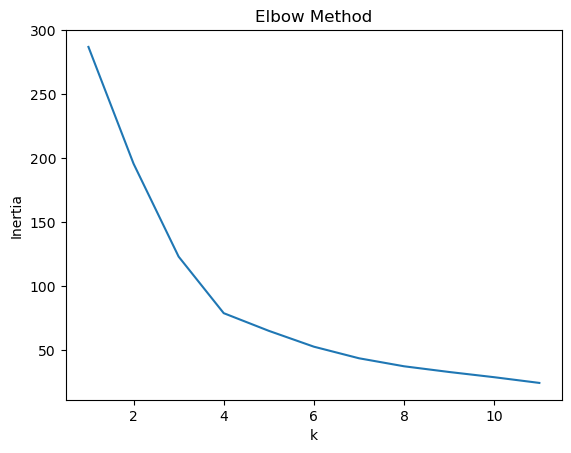

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
k_values = range(1, 12)
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.plot(k_values, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [155]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [156]:
# Fit the K-Means model using the scaled data
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [157]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.fit_predict(scaled_df)
# Print the resulting array of cluster values.
clusters

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [158]:
# Create a copy of the DataFrame
df_market_data_cluster =df_market_data.copy()

In [159]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_cluster['Cluster'] = clusters
# Display sample data
df_market_data_cluster.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [160]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot
scatter_plot = df_market_data_cluster.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=['coin_id'],  # Adjust based on your DataFrame structure
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes",
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage",
    width=800,
    height=600
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [161]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [162]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [163]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance Ratio by Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Sum of Explained Variance
print(f"\nTotal Explained Variance: {explained_variance.sum():.4f}")

Explained Variance Ratio by Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [164]:
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3']
)
# Copy the crypto names from the original data
# Set the coinid column as index
pca_df.index = scaled_df.index


# Display sample data
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

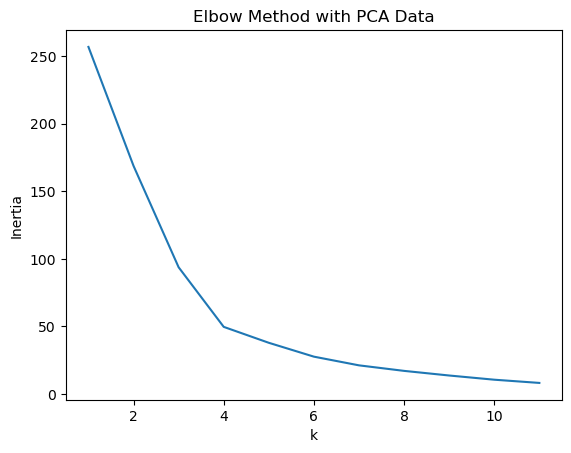

In [165]:
# Create an empty list to store the inertia values
inertia_pca = []
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_df )
    inertia_pca.append(model.inertia_)
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
plt.plot(k_values, inertia_pca)  
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method with PCA Data')
plt.show()

# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [166]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [167]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\johnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [168]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(clusters)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [169]:
# Create a copy of the DataFrame with the PCA data

pca_df_with_clusters = pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = clusters

# Display sample data
print(pca_df_with_clusters.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        3
ethereum     -0.458261  0.458466  0.952877        3
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        3


In [170]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = pca_df_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],  # Assumes 'coin_id' is available in your DataFrame to identify each point
    colormap='viridis',  # Feel free to choose a colormap that fits your preferences
    title='Cryptocurrency Clusters based on PCA',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    width=800,
    height=600
)

# Display the plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [172]:
print(len(inertia))  # Should print 11
print(len(inertia_pca))  # Should also print 11

11
11


In [173]:
# Assuming you have two lists or arrays: inertia_orig and inertia_pca, and a range of k values
df_inertia_orig = pd.DataFrame({'k': range(1, 12), 'inertia': inertia})
df_inertia_pca = pd.DataFrame({'k': range(1, 12), 'inertia': inertia_pca})

elbow_plot_orig = df_inertia_orig.hvplot.scatter(x='k', y='inertia', color='blue', title='Original Data Elbow Curve')
elbow_plot_pca = df_inertia_pca.hvplot.scatter(x='k', y='inertia', color='red', title='PCA Data Elbow Curve')

# Composite plot to compare elbow curves
elbow_comparison = elbow_plot_orig + elbow_plot_pca
elbow_comparison

:Layout
   .Scatter.I  :Scatter   [k]   (inertia)
   .Scatter.II :Scatter   [k]   (inertia)

In [181]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Finalizing the composite plot code with correct DataFrame names and columns
scatter_original = df_market_data_cluster.hvplot.scatter(
    x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', title='Clusters from Original Data'
)
scatter_pca = pca_df_with_clusters.hvplot.scatter(
    x='PC1', y='PC2', by='Cluster', title='Clusters from PCA Data'
)

# Creating a composite plot to compare the clusters
cluster_comparison = scatter_original + scatter_pca
cluster_comparison

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 